# Decision Tree Using CART & C4.5
## By Mohsin Ali Mirza k200353

In [10]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder



df = pd.DataFrame(
    {
        "Refund": ["Yes","Yes","Yes","Yes","Yes","Yes","Yes","No","No","No","No","No","No",],
        "Status": ["Single","Single","Single","Married","Married","Divorced","Divorced","Single","Single","Married","Married","Divorced","Divorced",],
        "Tax Income": [115, 60, 40, 130, 80, 130, 80, 75, 65, 125, 80, 90, 75],
        "Cheat": ["No","No","Yes","Yes","No","Yes","No","No","Yes","Yes","No","Yes","Yes",],
    }

)

df.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Refund      13 non-null     object
 1   Status      13 non-null     object
 2   Tax Income  13 non-null     int64 
 3   Cheat       13 non-null     object
dtypes: int64(1), object(3)

In [11]:
categorical_features = df.select_dtypes(include=[object])

 # Label encode the categorical features
for col in categorical_features:
  le = LabelEncoder()
  df[col] = le.fit_transform(categorical_features[col])

df.head()

,Refund,Status,Tax Income,Cheat
0,1,2,115,0
1,1,2,60,0
2,1,2,40,1
3,1,1,130,1
4,1,1,80,0


[Text(0.6, 0.8333333333333334, 'x[1] <= 120.0\nentropy = 0.996\nsamples = 13\nvalue = [6, 7]'),
 Text(0.4, 0.5, 'x[1] <= 50.0\nentropy = 0.971\nsamples = 10\nvalue = [6, 4]'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.918\nsamples = 9\nvalue = [6, 3]'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]')]

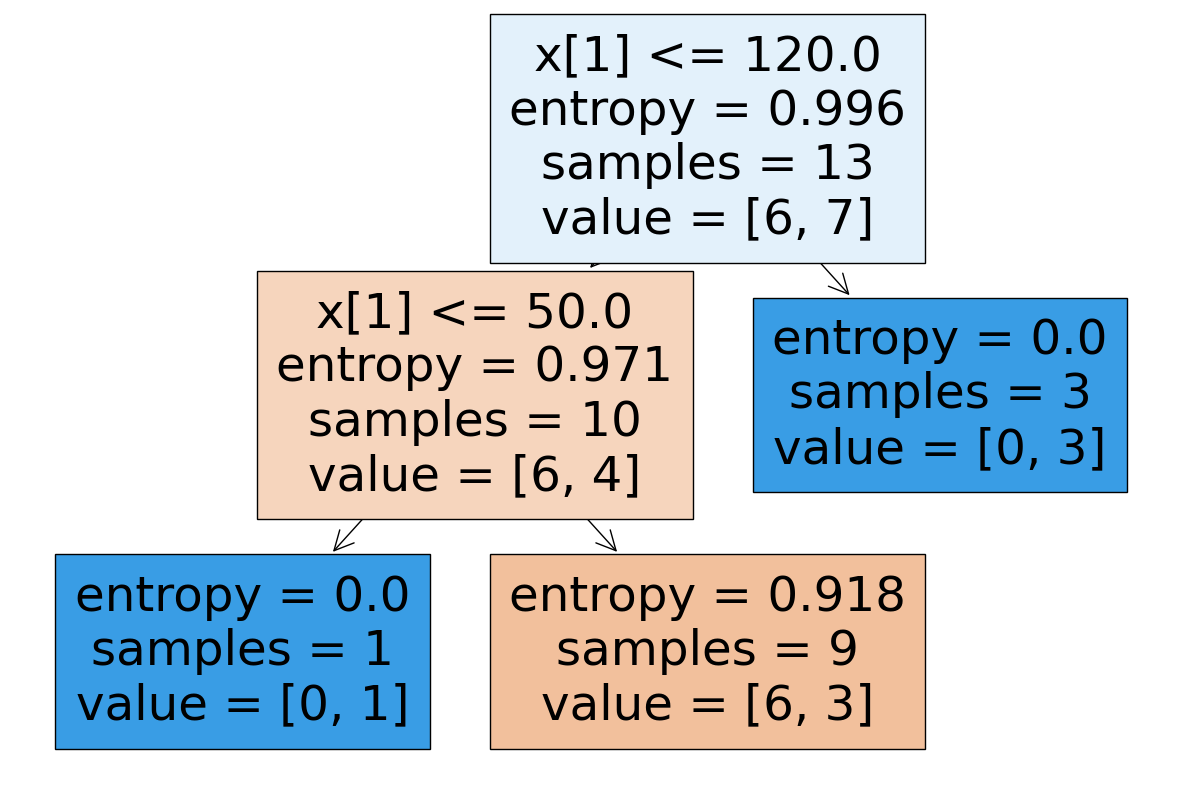

In [14]:
from sklearn import tree
import matplotlib.pyplot as plt

# Create a DecisionTreeClassifier object for C4.5
clf_c45 = DecisionTreeClassifier(criterion='entropy', max_depth=2)

# Fit the C4.5 decision tree to the data
clf_c45.fit(df[['Refund','Tax Income', 'Status']], df['Cheat'])

# Create a DecisionTreeClassifier object for CART
clf_cart = DecisionTreeClassifier(criterion='gini', max_depth=2)

# Fit the CART decision tree to the data
clf_cart.fit(df[['Refund','Tax Income', 'Status']], df['Cheat'])

# Print the C4.5 decision tree
plt.figure(figsize=(15, 10))
tree.plot_tree(clf_c45, filled=True)

[Text(0.6, 0.8333333333333334, 'x[1] <= 120.0\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.4, 0.5, 'x[0] <= 0.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

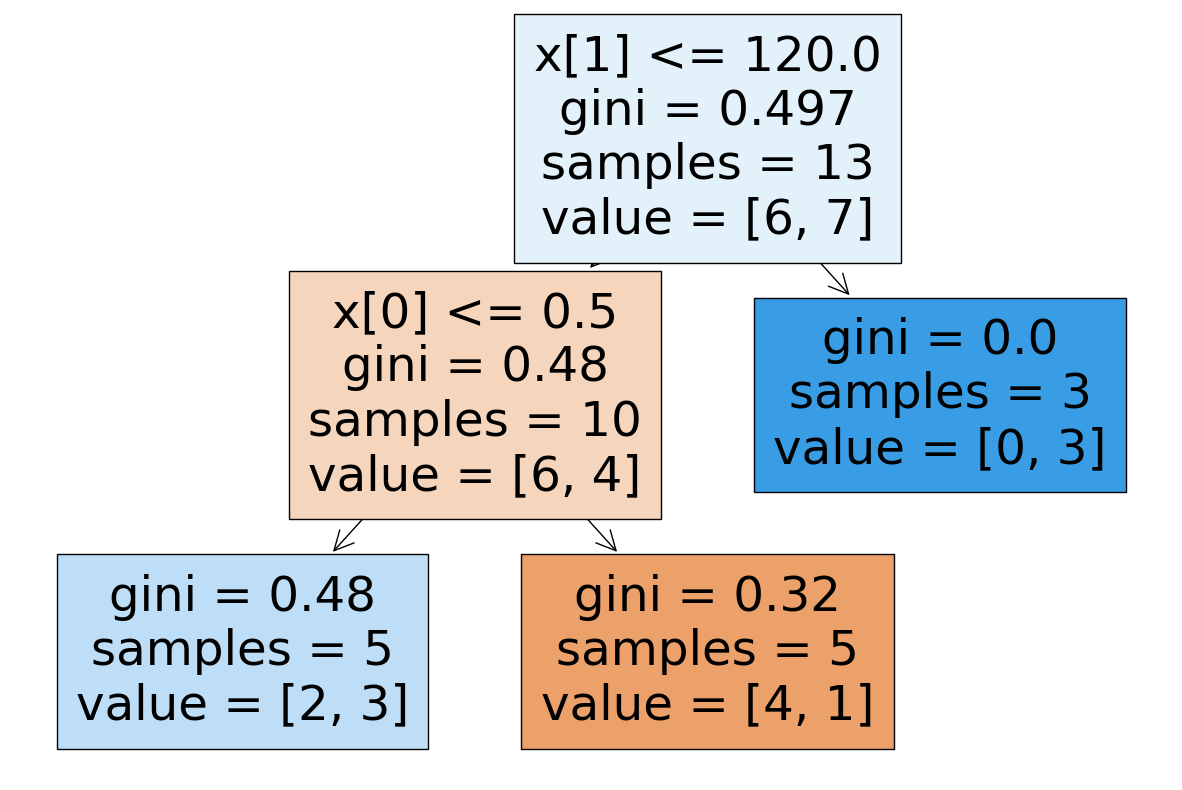

In [15]:

# Print the CART decision tree
plt.figure(figsize=(15, 10))
tree.plot_tree(clf_cart, filled=True)